## Nearest Neighbor-Based Data Imputation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [17]:
df = pd.read_csv ('data.csv')  #Reading the dataset into pandas dataframe

In [15]:
print("Original DataFrame:")  # Displaying initial dataframe with missing values
print(df.head())

Original DataFrame:
   Unnamed: 0  maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12  \
0    20010601   87.0  15.6  18.5   NaN  4.0   4.0   8.0  0.6946 -1.7101   
1    20010602   82.0   NaN   NaN   NaN  5.0   5.0   7.0 -4.3301 -4.0000   
2    20010603   92.0  15.3  17.6  19.5  2.0   NaN   NaN  2.9544     NaN   
3    20010604  114.0  16.2  19.7   NaN  1.0   1.0   0.0     NaN  0.3473   
4    20010605   94.0   NaN  20.5  20.4  NaN   NaN   NaN -0.5000 -2.9544   

     Vx15  maxO3v WindDirection  
0 -0.6946    84.0         North  
1 -3.0000    87.0         North  
2  0.5209    82.0          East  
3 -0.1736    92.0         North  
4 -4.3301   114.0          West  


In [18]:
df_numeric = df.drop(columns=['WindDirection'])  #Dropping the non-numerical column for the sake of imputation

In [19]:
df_numeric

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,20010925,NaN,13.3,NaN,17.8,3.0,5.0,NaN,0.0000,-1.0000,-1.2856,76.0
108,20010927,77.0,16.2,20.8,NaN,NaN,NaN,NaN,-0.6946,-2.0000,NaN,71.0
109,20010928,99.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5000,0.8682,0.8682,NaN
110,20010929,83.0,NaN,NaN,NaN,NaN,5.0,3.0,-4.0000,-3.7588,-4.0000,99.0


In [20]:
print("\nMissing values before imputation:")
print(df_numeric.isna().sum())  #Checking for sum of missing values in each column


Missing values before imputation:
Unnamed: 0     0
maxO3         16
T9            37
T12           33
T15           37
Ne9           34
Ne12          42
Ne15          32
Vx9           18
Vx12          10
Vx15          21
maxO3v        12
dtype: int64


__IMPUTATION__

In [21]:
df_imputed = df_numeric.copy(deep=True)  #Making a deep copy of the dataframe to be imputed

In [22]:
imputer = KNNImputer(n_neighbors=3)
df_imputed.iloc[:, :] = imputer.fit_transform(df_imputed)  # Applying KNN Imputation

In [24]:
print("\nMissing values after imputation:")
print(df_imputed.isna().sum())                # Checking if all missing values are filled


Missing values after imputation:
Unnamed: 0    0
maxO3         0
T9            0
T12           0
T15           0
Ne9           0
Ne12          0
Ne15          0
Vx9           0
Vx12          0
Vx15          0
maxO3v        0
dtype: int64


In [25]:
df_imputed  # Datafram with imputed values

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,20010601.0,87.0,15.600000,18.500000,17.566667,4.000000,4.000000,8.000000,0.694600,-1.7101,-0.6946,84.0
1,20010602.0,82.0,16.700000,17.966667,17.366667,5.000000,5.000000,7.000000,-4.330100,-4.0000,-3.0000,87.0
2,20010603.0,92.0,15.300000,17.600000,19.500000,2.000000,5.666667,6.333333,2.954400,-2.2454,0.5209,82.0
3,20010604.0,114.0,16.200000,19.700000,21.500000,1.000000,1.000000,0.000000,-0.326800,0.3473,-0.1736,92.0
4,20010605.0,94.0,17.733333,20.500000,20.400000,5.666667,6.000000,4.000000,-0.500000,-2.9544,-4.3301,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,20010925.0,84.0,13.300000,19.033333,17.800000,3.000000,5.000000,4.666667,0.000000,-1.0000,-1.2856,76.0
108,20010927.0,77.0,16.200000,20.800000,17.633333,4.666667,5.666667,6.333333,-0.694600,-2.0000,-0.5952,71.0
109,20010928.0,99.0,13.266667,19.833333,19.433333,2.666667,3.333333,3.666667,1.500000,0.8682,0.8682,81.0
110,20010929.0,83.0,14.733333,18.333333,18.733333,3.333333,5.000000,3.000000,-4.000000,-3.7588,-4.0000,99.0


__PLOTS__

In [26]:
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

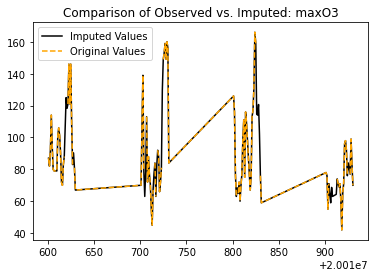

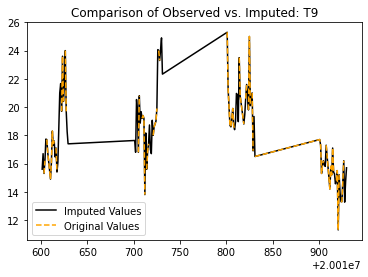

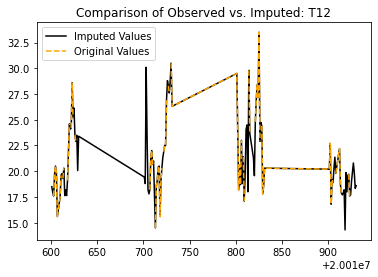

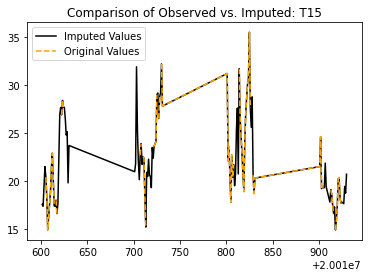

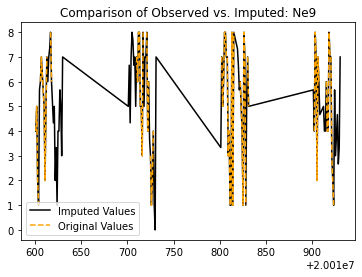

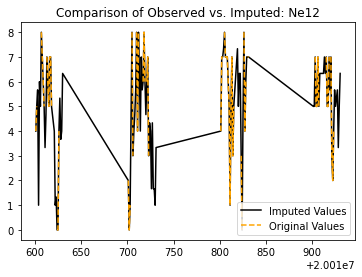

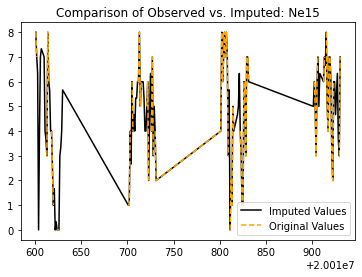

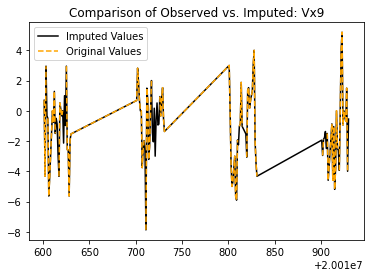

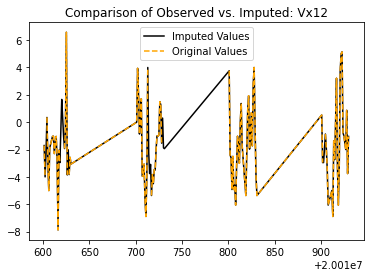

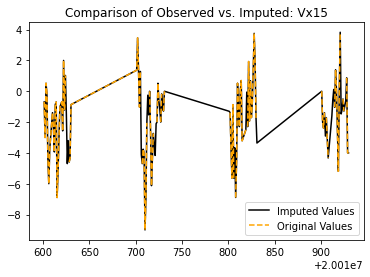

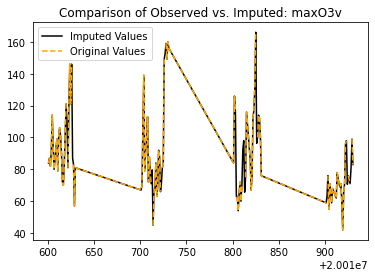

In [29]:
# Visualization: Comparing original and imputed values
for i in range(1, len(df_numeric.columns)):
    plt.title(f"Comparison of Observed vs. Imputed: {df_numeric.columns[i]}")
    plt.plot(df_imputed.iloc[:, 0], df_imputed.iloc[:, i], color='black', label='Imputed Values')
    plt.plot(df_numeric.iloc[:, 0], df_numeric.iloc[:, i], color='orange', linestyle='dashed', label='Original Values')
    plt.legend()
    plt.show()

## Conclusion  

In this project, we implemented **K-Nearest Neighbors (KNN) Imputation** to handle missing values in a dataset. The approach involved:  

- Identifying missing values in numerical columns  
- Using **KNN Imputer** to estimate and replace missing values based on similar data points  
- Comparing **imputed values** with **observed values** through visualizations  

From the plots, we observed that the distribution of imputed values closely follows the distribution of observed values, indicating that **KNN Imputation effectively preserves the data structure**. However, for datasets with large amounts of missing data or high dimensionality, alternative imputation methods such as **Multiple Imputation** or **Deep Learning-based techniques** could be explored.  

This analysis highlights the importance of **robust missing value treatment** in data preprocessing, ensuring that machine learning models receive **complete and reliable datasets** for accurate predictions.  
